<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W4D2_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d olgabelitskaya/flower-color-images

 94% 47.0M/50.1M [00:00<00:00, 67.1MB/s]
100% 50.1M/50.1M [00:00<00:00, 55.8MB/s]


In [4]:
!unzip flower-color-images.zip

Archive:  flower-color-images.zip
  inflating: FlowerColorImages.h5    
  inflating: flower_images/flower_images/0001.png  
  inflating: flower_images/flower_images/0002.png  
  inflating: flower_images/flower_images/0003.png  
  inflating: flower_images/flower_images/0004.png  
  inflating: flower_images/flower_images/0005.png  
  inflating: flower_images/flower_images/0006.png  
  inflating: flower_images/flower_images/0007.png  
  inflating: flower_images/flower_images/0008.png  
  inflating: flower_images/flower_images/0009.png  
  inflating: flower_images/flower_images/0010.png  
  inflating: flower_images/flower_images/0011.png  
  inflating: flower_images/flower_images/0012.png  
  inflating: flower_images/flower_images/0013.png  
  inflating: flower_images/flower_images/0014.png  
  inflating: flower_images/flower_images/0015.png  
  inflating: flower_images/flower_images/0016.png  
  inflating: flower_images/flower_images/0017.png  
  inflating: flower_images/flower_images/001

In [6]:
!pip install Pillow

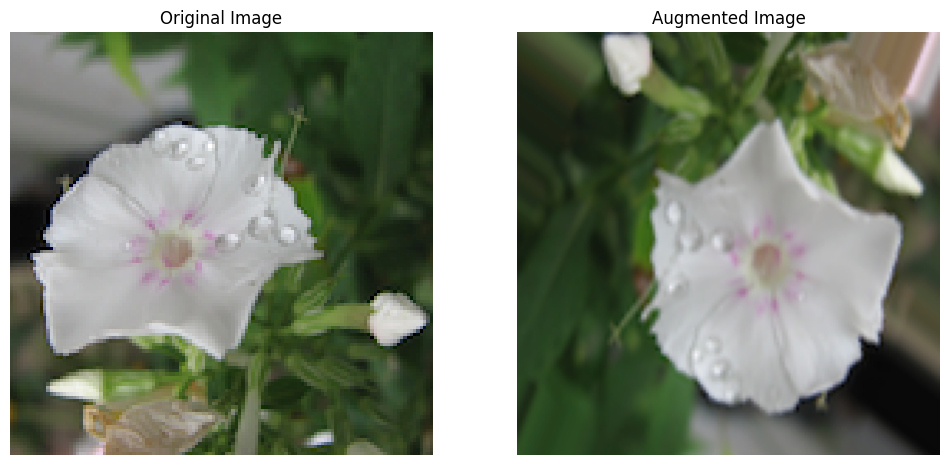

In [32]:
import os
import numpy as np
import zipfile
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Define the path to save the dataset
dataset_dir = '/flower_images/flower_images'

# Define the directory containing the extracted images
image_dir = os.path.join(dataset_dir, 'flower_images')


image_path = 'flowers/flowers/00_010.png'

# Open the image file
image = Image.open(image_path)

# Display the image
image.show()

# Define the image data generator with specified transformations
data_generator = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2
)

# Convert the original image to array and reshape
image_array = image.resize((150, 150))
image_array = image_array.convert('RGB')
image_array = np.array(image_array)
image_array = image_array.reshape((1,) + image_array.shape)

augmented_images = next(data_generator.flow(
    x=image_array,
    batch_size=1,
    shuffle=False
))

augmented_image = Image.fromarray(augmented_images[0].astype('uint8'))

def show_images(original, augmented, title):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.imshow(original)
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(augmented)
  plt.title(title)
  plt.axis('off')

  plt.show()

show_images(image, augmented_image, 'Augmented Image')